###Install dependancies

In [1]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 3.8 MB/s eta 0:00:00


# Instantiate Neo4j

In [4]:
from neo4j import GraphDatabase
from google.colab import userdata

uri = userdata.get(NEO4J_URI)
user = userdata.get(NEO4J_USERNAME)
password = userdata.get(NEO4J_PASSWORD)

driver = GraphDatabase.driver(uri, auth=(user, password))

 **Clearing Database**

In [5]:
# Clearing database before inserting data
def clear_database():
    with driver.session() as session:
        session.run("MATCH (n) DETACH DELETE n;")
        print("Database cleared.")

clear_database()

Database cleared.


In [6]:
# Defining function to execute a cypher query on neo4j driver
def run_query(query, parameters=None):
    with driver.session() as session:
        results = session.run(query, parameters)
        return [dict(record) for record in results]

In [7]:
# Cypher query for inserting data about basketball
cypher_query = """
CREATE
(russell:PLAYER{name:"Russell Westbrook", age: 33, number: 0, height: 1.91, weight: 91}),
(lebron:PLAYER{name:"LeBron James", age: 36, number: 6, height: 2.06, weight: 113}),
(anthony:PLAYER{name:"Anthony Davis", age: 28, number: 23, height: 2.08, weight: 115}),
(ja:PLAYER{name:"Ja Morant", age: 22, number: 12, height: 1.91, weight: 79}),
(luka:PLAYER{name:"Luka Doncic", age: 22, number: 77, height: 2.01, weight: 104}),
(kristaps:PLAYER{name:"Kristaps Porzingis", age: 26, number: 6, height: 2.21, weight: 109}),
(kevin:PLAYER{name:"Kevin Durant", age: 33, number: 7, height: 2.08, weight: 109}),
(james:PLAYER{name:"James Harden", age: 32, number: 13, height: 1.96, weight: 100}),
(giannis:PLAYER{name:"Giannis Antetokounmpo", age: 26, number: 34, height: 2.11, weight: 110}),
(khris:PLAYER{name:"Khris Middleton", age: 30, number: 22, height: 2.01, weight: 100}),
(joel:PLAYER{name:"Joel Embiid", age: 27, number: 21, height: 2.13, weight: 127}),
(tobias:PLAYER{name:"Tobias Harris", age: 29, number: 22, height: 2.03, weight: 100}),

(frank:COACH{name: "Frank Vogel"}),
(taylor:COACH{name: "Taylor Jenkins"}),
(jason:COACH{name: "Jason Kidd"}),
(steve:COACH{name: "Steve Nash"}),
(mike:COACH{name: "Mike Budenholzer"}),
(doc:COACH{name: "Doc Rivers"}),
(stan:COACH{name: "Stan Van Gundy"}),

(lakers:TEAM{name:"LA Lakers"}),
(memphis:TEAM{name:"Memphis Grizzlies"}),
(mavericks:TEAM{name:"Dallas Mavericks"}),
(nets:TEAM{name:"Brooklyn Nets"}),
(bucks:TEAM{name:"Milwaukee Bucks"}),
(sixers:TEAM{name:"Philadelphia 76ers"}),

(lebron)-[:TEAMMATES]-> (russell),
(lebron)<-[:TEAMMATES]- (russell),
(lebron)-[:TEAMMATES]-> (anthony),
(lebron)<-[:TEAMMATES]- (anthony),
(russell)-[:TEAMMATES]-> (anthony),
(russell)<-[:TEAMMATES]- (anthony),
(luka)-[:TEAMMATES]-> (kristaps),
(luka)<-[:TEAMMATES]- (kristaps),
(kevin)-[:TEAMMATES]-> (james),
(kevin)<-[:TEAMMATES]- (james),
(giannis)-[:TEAMMATES]-> (khris),
(giannis)<-[:TEAMMATES]- (khris),
(joel)-[:TEAMMATES]-> (tobias),
(joel)<-[:TEAMMATES]- (tobias),

(frank)-[:COACHES]->(lebron),
(frank)-[:COACHES]->(anthony),
(frank)-[:COACHES]->(russell),
(taylor)-[:COACHES]->(ja),
(jason)-[:COACHES]->(luka),
(jason)-[:COACHES]->(kristaps),
(steve)-[:COACHES]->(kevin),
(steve)-[:COACHES]->(james),
(mike)-[:COACHES]->(giannis),
(mike)-[:COACHES]->(khris),
(doc)-[:COACHES]->(tobias),
(doc)-[:COACHES]->(joel),

(lebron)-[:PLAYS_FOR {salary: 40000000}]-> (lakers),
(russell)-[:PLAYS_FOR {salary: 33000000}]-> (lakers),
(anthony)-[:PLAYS_FOR {salary: 38000000}]-> (lakers),
(ja)-[:PLAYS_FOR {salary: 8000000}]-> (memphis),
(luka)-[:PLAYS_FOR {salary: 50000000}]-> (mavericks),
(kristaps)-[:PLAYS_FOR {salary: 26000000}]-> (mavericks),
(kevin)-[:PLAYS_FOR {salary: 45000000}]-> (nets),
(james)-[:PLAYS_FOR{salary: 4200000}]-> (nets),
(giannis)-[:PLAYS_FOR {salary: 47000000}]-> (bucks),
(khris)-[:PLAYS_FOR {salary: 43000000}]-> (bucks),
(joel)-[:PLAYS_FOR {salary: 4000000}]-> (sixers),
(tobias)-[:PLAYS_FOR {salary: 4000000}]-> (sixers),

(frank)-[:COACHES_FOR]->(lakers),
(taylor)-[:COACHES_FOR]->(memphis),
(jason)-[:COACHES_FOR]->(mavericks),
(steve)-[:COACHES_FOR]->(nets),
(mike)-[:COACHES_FOR]->(bucks),
(doc)-[:COACHES_FOR]->(sixers),


(lebron)-[:PLAYED_AGAINST {minutes: 38, points: 32, assists: 6, rebounds: 6, turnovers: 2}]-> (memphis),
(russell)-[:PLAYED_AGAINST {minutes: 29, points: 16, assists: 12, rebounds: 11, turnovers: 16}]-> (memphis),
(anthony)-[:PLAYED_AGAINST {minutes: 36, points: 27, assists: 2, rebounds: 8, turnovers: 1}]-> (memphis),
(ja)-[:PLAYED_AGAINST {minutes: 43, points: 42, assists: 7, rebounds: 8, turnovers: 4}]-> (lakers),

(lebron)-[:PLAYED_AGAINST {minutes: 23, points: 25, assists: 12, rebounds: 3, turnovers: 0}]-> (memphis),
(russell)-[:PLAYED_AGAINST {minutes: 20, points: 11, assists: 10, rebounds: 3, turnovers: 8}]-> (memphis),
(anthony)-[:PLAYED_AGAINST {minutes: 30, points: 22, assists: 2, rebounds: 8, turnovers: 1}]-> (memphis),
(ja)-[:PLAYED_AGAINST {minutes: 35, points: 35, assists: 3, rebounds: 4, turnovers: 2}]-> (lakers),

(lebron)-[:PLAYED_AGAINST {minutes: 32, points: 18, assists: 3, rebounds: 6, turnovers: 1}]-> (nets),
(russell)-[:PLAYED_AGAINST {minutes: 26, points: 26, assists: 11, rebounds: 13, turnovers: 6}]-> (nets),
(anthony)-[:PLAYED_AGAINST {minutes: 30, points: 26, assists: 7, rebounds: 18, turnovers: 3}]-> (nets),
(kevin)-[:PLAYED_AGAINST {minutes: 43, points: 45, assists: 5, rebounds: 8, turnovers: 2}]-> (lakers),
(james)-[:PLAYED_AGAINST {minutes: 46, points: 35, assists: 13, rebounds: 4, turnovers: 7}]-> (lakers),

(kevin)-[:PLAYED_AGAINST {minutes: 34, points: 37, assists: 2, rebounds: 12, turnovers: 1}]-> (memphis),
(james)-[:PLAYED_AGAINST {minutes: 46, points: 35, assists: 13, rebounds: 4, turnovers: 7}]-> (memphis),
(ja)-[:PLAYED_AGAINST {minutes: 26, points: 32, assists: 13, rebounds: 6, turnovers: 2}]-> (nets),


(luka)-[:PLAYED_AGAINST {minutes: 44, points: 23, assists: 7, rebounds: 13, turnovers: 8}]-> (bucks),
(kristaps)-[:PLAYED_AGAINST {minutes: 24, points: 16, assists: 2, rebounds: 12, turnovers: 0}]-> (bucks),
(giannis)-[:PLAYED_AGAINST {minutes: 33, points: 26, assists: 16, rebounds: 18, turnovers: 5}]-> (mavericks),
(khris)-[:PLAYED_AGAINST {minutes: 46, points: 35, assists: 3, rebounds: 4, turnovers: 3}]-> (mavericks),

(luka)-[:PLAYED_AGAINST {minutes: 33, points: 28, assists: 6, rebounds: 3, turnovers: 3}]-> (sixers),
(kristaps)-[:PLAYED_AGAINST {minutes: 24, points: 18, assists: 4, rebounds: 11, turnovers: 1}]-> (sixers),
(joel)-[:PLAYED_AGAINST {minutes: 25, points: 29, assists: 7, rebounds: 22, turnovers: 2}]-> (mavericks),
(tobias)-[:PLAYED_AGAINST {minutes: 34, points: 18, assists: 13, rebounds: 4, turnovers: 0}]-> (mavericks),

(giannis)-[:PLAYED_AGAINST {minutes: 45, points: 36, assists: 5, rebounds: 12, turnovers: 3}]-> (sixers),
(khris)-[:PLAYED_AGAINST {minutes: 35, points: 22, assists: 5, rebounds: 6, turnovers: 0}]-> (sixers),
(joel)-[:PLAYED_AGAINST {minutes: 33, points: 23, assists: 3, rebounds: 10, turnovers: 3}]-> (bucks),
(tobias)-[:PLAYED_AGAINST {minutes: 38, points: 23, assists: 4, rebounds: 5, turnovers: 1}]-> (bucks),

(kevin)-[:PLAYED_AGAINST {minutes: 29, points: 28, assists: 6, rebounds: 8, turnovers: 0}]-> (mavericks),
(james)-[:PLAYED_AGAINST {minutes: 35, points: 17, assists: 10, rebounds: 8, turnovers: 5}]-> (mavericks),
(luka)-[:PLAYED_AGAINST {minutes: 37, points: 35, assists: 6, rebounds: 11, turnovers: 4}]-> (nets),
(kristaps)-[:PLAYED_AGAINST {minutes: 34, points: 27, assists: 4, rebounds: 8, turnovers: 0}]-> (nets),

(lebron)-[:PLAYED_AGAINST {minutes: 32, points: 27, assists: 12, rebounds: 10, turnovers: 4}]-> (sixers),
(russell)-[:PLAYED_AGAINST {minutes: 25, points: 19, assists: 9, rebounds: 14, turnovers: 5}]-> (sixers),
(anthony)-[:PLAYED_AGAINST {minutes: 32, points: 22, assists: 7, rebounds: 12, turnovers: 2}]-> (sixers),
(joel)-[:PLAYED_AGAINST {minutes: 36, points: 36, assists: 7, rebounds: 12, turnovers: 0}]-> (lakers),
(tobias)-[:PLAYED_AGAINST {minutes: 32, points: 22, assists: 1, rebounds: 7, turnovers: 0}]-> (lakers);
"""

result = run_query(cypher_query)
print(result)

[]


# Run Query

In [8]:
query = """
        MATCH (p:PLAYER)
        RETURN p;
        """
result = run_query(query)
print(result)

[{'p': <Node element_id='4:5aeee694-9ae0-4c9d-9b96-75f399fc795b:25' labels=frozenset({'PLAYER'}) properties={'number': 0, 'name': 'Russell Westbrook', 'weight': 91, 'age': 33, 'height': 1.91}>}, {'p': <Node element_id='4:5aeee694-9ae0-4c9d-9b96-75f399fc795b:26' labels=frozenset({'PLAYER'}) properties={'number': 6, 'name': 'LeBron James', 'weight': 113, 'age': 36, 'height': 2.06}>}, {'p': <Node element_id='4:5aeee694-9ae0-4c9d-9b96-75f399fc795b:27' labels=frozenset({'PLAYER'}) properties={'number': 23, 'name': 'Anthony Davis', 'weight': 115, 'age': 28, 'height': 2.08}>}, {'p': <Node element_id='4:5aeee694-9ae0-4c9d-9b96-75f399fc795b:28' labels=frozenset({'PLAYER'}) properties={'number': 12, 'name': 'Ja Morant', 'weight': 79, 'age': 22, 'height': 1.91}>}, {'p': <Node element_id='4:5aeee694-9ae0-4c9d-9b96-75f399fc795b:29' labels=frozenset({'PLAYER'}) properties={'number': 77, 'name': 'Luka Doncic', 'weight': 104, 'age': 22, 'height': 2.01}>}, {'p': <Node element_id='4:5aeee694-9ae0-4c9d-9

In [9]:
# Function to fetch and transform data from Neo4j
def transform_data_to_text(data):
    descriptions = []
    for record in data:
        player = record['p']
        team = record['t']
        coach = record['c']
        plays_for = f"{player['name']} plays for {team['name']}."
        coached_by = f"{player['name']} is coached by {coach['name']}."
        descriptions.append(plays_for)
        descriptions.append(coached_by)
    return descriptions

# Cypher query to fetch player-team-coach relationships
query = """
    MATCH (p:PLAYER)-[:PLAYS_FOR]->(t:TEAM),
          (c:COACH)-[:COACHES_FOR]->(t)
    RETURN p, t, c
"""

# Execute the query and transform the data
data = run_query(query)
text_descriptions = transform_data_to_text(data)
print(text_descriptions)

# # Output the results
# for description in text_descriptions:
#     print(description)


['Russell Westbrook plays for LA Lakers.', 'Russell Westbrook is coached by Frank Vogel.', 'LeBron James plays for LA Lakers.', 'LeBron James is coached by Frank Vogel.', 'Anthony Davis plays for LA Lakers.', 'Anthony Davis is coached by Frank Vogel.', 'Ja Morant plays for Memphis Grizzlies.', 'Ja Morant is coached by Taylor Jenkins.', 'Luka Doncic plays for Dallas Mavericks.', 'Luka Doncic is coached by Jason Kidd.', 'Kristaps Porzingis plays for Dallas Mavericks.', 'Kristaps Porzingis is coached by Jason Kidd.', 'Kevin Durant plays for Brooklyn Nets.', 'Kevin Durant is coached by Steve Nash.', 'James Harden plays for Brooklyn Nets.', 'James Harden is coached by Steve Nash.', 'Giannis Antetokounmpo plays for Milwaukee Bucks.', 'Giannis Antetokounmpo is coached by Mike Budenholzer.', 'Khris Middleton plays for Milwaukee Bucks.', 'Khris Middleton is coached by Mike Budenholzer.', 'Joel Embiid plays for Philadelphia 76ers.', 'Joel Embiid is coached by Doc Rivers.', 'Tobias Harris plays f

In [10]:
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [11]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [12]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed the text descriptions
embeddings = model.encode(text_descriptions)
print(f"Generated {len(embeddings)} embeddings with shape {embeddings[0].shape}")


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated 24 embeddings with shape (384,)


In [13]:
!pip install pinecone-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 10.7 MB/s eta 0:00:00


In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=20,
    length_function=len
)

text_chunks = []
for description in text_descriptions:
    chunks = text_splitter.split_text(description)
    text_chunks.extend(chunks)

# Generate embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(text_chunks)

# Determine the dimension of the embeddings
dimension = len(embeddings[0])
print(dimension)
# len(dimension)

384


In [15]:
from pinecone import Pinecone, ServerlessSpec

# Initialize Pinecone
pinecone = Pinecone(
    api_key=userdata.get("PINECONE_API_KEY")
    )
index_name = 'neo4j-basketball'


# Removing an index withe same name if exists

In [19]:
# Deleting an index with the same name before creating
pinecone.delete_index(index_name)
print(f"Index '{index_name}' deleted.")

Index 'neo4j-basketball' deleted.


In [20]:
# Create the index if it does not exist already
if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name,
        dimension=dimension,
        metric='cosine',
        spec=ServerlessSpec(
            cloud=userdata.get("PINECONE_CLOUD"),
            region=userdata.get("PINECONE_ENVIRONMENT")
        )
    )

# Connect to the index
pinecone_index = pinecone.Index(index_name)

# Step 5: Upsert embeddings into Pinecone
docs = [(str(idx), embedding, {'text': chunk}) for idx, (chunk, embedding) in enumerate(zip(text_chunks, embeddings))]
pinecone_index.upsert(vectors=docs, show_progress=True)

{'upserted_count': 24}

In [21]:
!pip install together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [22]:
from together import Together

# Initialize together.ai client
client = Together(api_key=userdata.get("TOGETHER_API_KEY"))

B_INST, E_INST = "[INST]", "[/INST]"
B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n\n"
DEFAULT_SYSTEM_PROMPT = """\
  You will be given texts related to a certain topic. Write a summary response that answers the question based on what is discussed in the texts.
  Do not mention anything outside of what is provided. Don't answer anything outside the context you are provided.
  If there isn't enough context, simply reply "This topic was not discussed previously"
  """

SYSTEM_PROMPT = B_SYS + DEFAULT_SYSTEM_PROMPT + E_SYS

# Function to generate the prompt for together.ai
def get_prompt(instruction):
    prompt_template =  B_INST + SYSTEM_PROMPT + instruction + E_INST
    return prompt_template

def format_prompt(query, context):
    return '''
    ### Texts:
    {context}

    ### Question:
    {query}
    '''.format(context=context, query=query)

# Define the function that gets the context from Neo4j
def get_data_from_db(query):
    # Modify according to your schema and requirements
    query = """
        MATCH (p:PLAYER)-[:PLAYS_FOR]->(t:TEAM),
              (c:COACH)-[:COACHES_FOR]->(t)
        RETURN p, t, c
    """
    data = run_query(query)
    context = transform_data_to_text(data)
    return "\n".join(context)


In [23]:
def answer(query):
    # Fetch context from the database
    context = get_data_from_db(query)

    # Format the prompt
    prompt = format_prompt(query, context)
    prompt_template = get_prompt(prompt)

    # Request response from together.ai
    stream = client.chat.completions.create(
        model="mistralai/Mixtral-8x7B-Instruct-v0.1",
        messages=[{"role": "user", "content": prompt_template}],
        stream=True,
    )

    # Print the response
    response_text = ""
    for chunk in stream:
        response_text += chunk.choices[0].delta.content or ""
    print(response_text)

# Possible queries to test the model


*   Who is Lebron?
*   Who is the coach for bucks?
*   Which players play for the LA Lakers?




In [24]:
answer("Which players play for the LA Lakers?")

 Russell Westbrook, LeBron James, and Anthony Davis play for the LA Lakers.


## Visualization

In [25]:
def fetch_schema():
    with driver.session() as session:
        result = session.run("CALL db.schema.visualization()")
        # Collect all records into a list
        schema_data = [record for record in result]
        return schema_data

schema_data = fetch_schema()
print(schema_data)

[<Record nodes=[<Node element_id='-208' labels=frozenset({'PLAYER'}) properties={'name': 'PLAYER', 'indexes': [], 'constraints': []}>, <Node element_id='-210' labels=frozenset({'TEAM'}) properties={'name': 'TEAM', 'indexes': [], 'constraints': []}>, <Node element_id='-209' labels=frozenset({'COACH'}) properties={'name': 'COACH', 'indexes': [], 'constraints': []}>] relationships=[<Relationship element_id='-283' nodes=(<Node element_id='-209' labels=frozenset({'COACH'}) properties={'name': 'COACH', 'indexes': [], 'constraints': []}>, <Node element_id='-210' labels=frozenset({'TEAM'}) properties={'name': 'TEAM', 'indexes': [], 'constraints': []}>) type='COACHES_FOR' properties={'name': 'COACHES_FOR'}>, <Relationship element_id='-282' nodes=(<Node element_id='-208' labels=frozenset({'PLAYER'}) properties={'name': 'PLAYER', 'indexes': [], 'constraints': []}>, <Node element_id='-210' labels=frozenset({'TEAM'}) properties={'name': 'TEAM', 'indexes': [], 'constraints': []}>) type='PLAYS_FOR' p

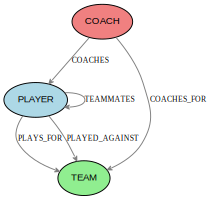

In [26]:
from graphviz import Digraph
from IPython.display import display, SVG

def extract_and_plot_schema(schema_data):
    dot = Digraph(comment='Schema Visualization', format='svg')

    # Set global graph properties
    dot.attr(dpi='70', fontsize='10', fontname='Helvetica', bgcolor='white')

    # Define custom node and edge styles
    dot.attr('node', shape='ellipse', style='filled', fontname='Helvetica', fontsize='10', color='black')
    dot.attr('edge', color='gray', fontsize='8', arrowhead='vee', arrowsize='0.5')

    # Define colors for different node labels
    label_colors = {
        'PLAYER': 'lightblue',
        'TEAM': 'lightgreen',
        'COACH': 'lightcoral'
    }

    # Add nodes and edges
    for record in schema_data:
        nodes = record.get('nodes', [])
        relationships = record.get('relationships', [])

        for node in nodes:
            node_id = node.element_id
            node_label = ', '.join(node.labels) if node.labels else 'Unknown'
            # Use label_colors dictionary to set node colors
            fillcolor = label_colors.get(next(iter(node.labels)), 'lightgray')
            dot.node(node_id, label=node_label, fillcolor=fillcolor)

        for rel in relationships:
            start_node = rel.nodes[0].element_id
            end_node = rel.nodes[1].element_id
            rel_type = rel.type
            dot.edge(start_node, end_node, label=rel_type)

    # Render and display the graph directly in the notebook
    svg_data = dot.pipe(format='svg')
    display(SVG(svg_data))

# Fetch schema data and plot
schema_data = fetch_schema()
extract_and_plot_schema(schema_data)
